<a href="https://colab.research.google.com/github/Akansha9812/CNN_Data_mining/blob/main/Facial_Expressions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#reference-https://www.kaggle.com/general/74235

In [1]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [4]:
!mkdir ~/.kaggle

In [5]:
! cp kaggle.json ~/.kaggle/

In [6]:
#the owner of the file has read and write access, while the group members and other users on the system only have read access.
! chmod 644 ~/.kaggle/kaggle.json

In [7]:
! kaggle datasets list

ref                                                           title                                          size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------------------  ---------------------------------------------  ----  -------------------  -------------  ---------  ---------------  
salvatorerastelli/spotify-and-youtube                         Spotify and Youtube                             9MB  2023-03-20 15:43:25           1136         40  1.0              
dgoenrique/netflix-movies-and-tv-shows                        Netflix Movies and TV Shows                     2MB  2023-03-13 18:49:00            818         27  1.0              
rajkumarpandey02/list-of-countries-by-gdp-sector-composition  List of Countries by GDP Sector Composition     8KB  2023-03-20 04:42:10           1016         35  1.0              
datascientistanna/customers-dataset                           Shop Customer Data                    

In [8]:
#! kaggle datasets download -c 'Facial-Emotion-Expressions'
! kaggle datasets download -d samaneheslamifar/facial-emotion-expressions

100% 120M/121M [00:03<00:00, 40.7MB/s]
100% 121M/121M [00:03<00:00, 34.4MB/s]


In [9]:
! unzip facial-emotion-expressions.zip

Streaming output truncated to the last 5000 lines.
  inflating: images/validation/fear/8797.jpg  
  inflating: images/validation/fear/8818.jpg  
  inflating: images/validation/fear/886.jpg  
  inflating: images/validation/fear/9037.jpg  
  inflating: images/validation/fear/9040.jpg  
  inflating: images/validation/fear/9101.jpg  
  inflating: images/validation/fear/911.jpg  
  inflating: images/validation/fear/9179.jpg  
  inflating: images/validation/fear/9205.jpg  
  inflating: images/validation/fear/9232.jpg  
  inflating: images/validation/fear/9251.jpg  
  inflating: images/validation/fear/9261.jpg  
  inflating: images/validation/fear/9281.jpg  
  inflating: images/validation/fear/9302.jpg  
  inflating: images/validation/fear/9333.jpg  
  inflating: images/validation/fear/9369.jpg  
  inflating: images/validation/fear/9370.jpg  
  inflating: images/validation/fear/9474.jpg  
  inflating: images/validation/fear/949.jpg  
  inflating: images/validation/fear/9602.jpg  
  inflating:

In [10]:
!pip install datasets
import datasets
from datasets import load_dataset


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 469.0/469.0 KB 20.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 KB 27.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 KB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 58.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.9/132.9 KB 18.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.8/199.8 KB 24.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 KB 18.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 KB 22.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 KB 15.5 MB/s eta 0:00:00


In [12]:
!pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [13]:
!pip install tensorflow==2.7.0


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 489.7/489.7 MB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 73.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 KB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 463.1/463.1 KB 42.3 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.11.0
    Uninstalling tensorflow-estimator-2.11.0:
      Successfully uninstalled tensorflow-estimator-2.11.0
  Attempting uninstall: keras
    Found existing installation: keras 2.11.0
    Uninstalling keras-2.11.0:
      Successfully uninstalled keras-2.11.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 23.3.3
    Uninstalling flatbuffers-23.3.3:
      Successfully uninstalled flatbuffers-23.3.3
  Attempting uninstall: tensorflow
    Foun

In [34]:
#Reference of the below code -
#https://github.com/akmadan/Emotion_Detection_CNN/blob/main/emotion-classification-cnn-using-keras.ipynb
#All the lines of code (below) are taken from the link above unless and until mentioned explicitly.

In [35]:
#importing for visualization
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import image as mpimg
import pandas as pd
import seaborn as sns
import os

#importing to learn the CNN models
import tensorflow.keras.preprocessing
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from keras.models import Model,Sequential
from tensorflow.keras.optimizers import SGD,Adam,RMSprop


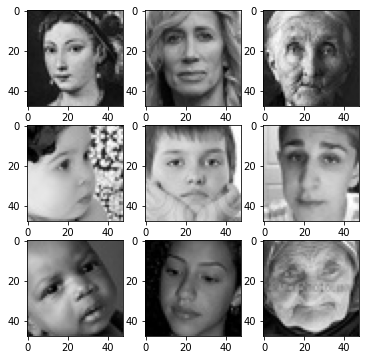

In [45]:
#To check if the dataset has been correctly imported-Display a few images.
#Displaying few images of NEUTRAL expression.
plt.figure(figsize= (6,6))
i = 0
for i in range(1,10):
    plt.subplot(3,3,i)
    img = load_img("/content/images/"+"train/"+'neutral'+"/"+
          os.listdir("/content/images/" + "train/" + 'neutral')[i], target_size=(48, 48))
    plt.imshow(img)  
plt.show()

In [47]:
batch_size = 32 #No. of training examples taken in one epoch
datagen_train  = ImageDataGenerator()
datagen_val = ImageDataGenerator()
train_set = datagen_train.flow_from_directory("/content/images/"+"train", target_size = (48,48),
                                              color_mode = "grayscale", batch_size=batch_size,
                                              class_mode='categorical', shuffle=True)
test_set = datagen_val.flow_from_directory("/content/images/"+"validation", target_size = (48,48),
                                              color_mode = "grayscale", batch_size=batch_size,
                                              class_mode='categorical', shuffle=True)
#Changes I have made is decrement of batch size and enabled shuffling for both train & validation sets.

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


In [117]:
#Main model
no_of_classes = 7
model = Sequential()
#1st CNN layer
model.add(Conv2D(16,(5,5),padding = 'same',input_shape = (48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

#2nd CNN layer
model.add(Conv2D(32,(3,3),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#3rd CNN layer
model.add(Conv2D(64,(5,5),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#4th CNN layer
model.add(Conv2D(128,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

#5th CNN layer
model.add(Conv2D(256, (5, 5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
#Fully connected 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(no_of_classes, activation='softmax'))
opt = SGD(lr = 0.001)
model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])

#model.summary()

#Changes I made in this is I added one more CNN layer, changed the shape of kerels
#On adding two, resulted in a comparitively slow increment of accuracy.
#Increased the learning rate
#Changed the optimiser to gradient descent (SGD)
#Resulted in a better accuracy


/usr/local/lib/python3.9/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [120]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stopping = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.001)

callbacks_list = [early_stopping,reduce_learningrate]

epochs = 20

model.compile(loss='categorical_crossentropy',
              optimizer = SGD(lr=0.01),
              metrics=['accuracy'])

/usr/local/lib/python3.9/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [121]:
import time
start_time_train = time.time()
history = model.fit_generator(generator=train_set,
                                steps_per_epoch=train_set.n//train_set.batch_size,
                                epochs=epochs,
                                validation_data = test_set,
                                validation_steps = test_set.n//test_set.batch_size,
                                callbacks=callbacks_list
                                )

end_time_train = time.time()
total_time_taken_train = end_time_train - start_time_train
val_accuracy_train = history.history['val_accuracy'][-1]

<ipython-input-121-724ece2d4940>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator=train_set,


Epoch 1/20
900/900 [==============================] - 203s 223ms/step - loss: 1.6580 - accuracy: 0.3400 - val_loss: 1.6242 - val_accuracy: 0.3661 - lr: 0.0100
Epoch 2/20
900/900 [==============================] - 200s 223ms/step - loss: 1.6138 - accuracy: 0.3655 - val_loss: 1.7832 - val_accuracy: 0.3304 - lr: 0.0100
Epoch 3/20
900/900 [==============================] - 200s 222ms/step - loss: 1.5764 - accuracy: 0.3795 - val_loss: 1.5416 - val_accuracy: 0.3884 - lr: 0.0100
Epoch 4/20
900/900 [==============================] - 200s 222ms/step - loss: 1.5575 - accuracy: 0.3918 - val_loss: 1.4930 - val_accuracy: 0.4205 - lr: 0.0100
Epoch 5/20
900/900 [==============================] - 199s 221ms/step - loss: 1.5279 - accuracy: 0.4021 - val_loss: 1.5276 - val_accuracy: 0.4170 - lr: 0.0100
Epoch 6/20
900/900 [==============================] - 201s 223ms/step - loss: 1.5048 - accuracy: 0.4130 - val_loss: 1.4403 - val_accuracy: 0.4429 - lr: 0.0100
Epoch 7/20
900/900 [==========================

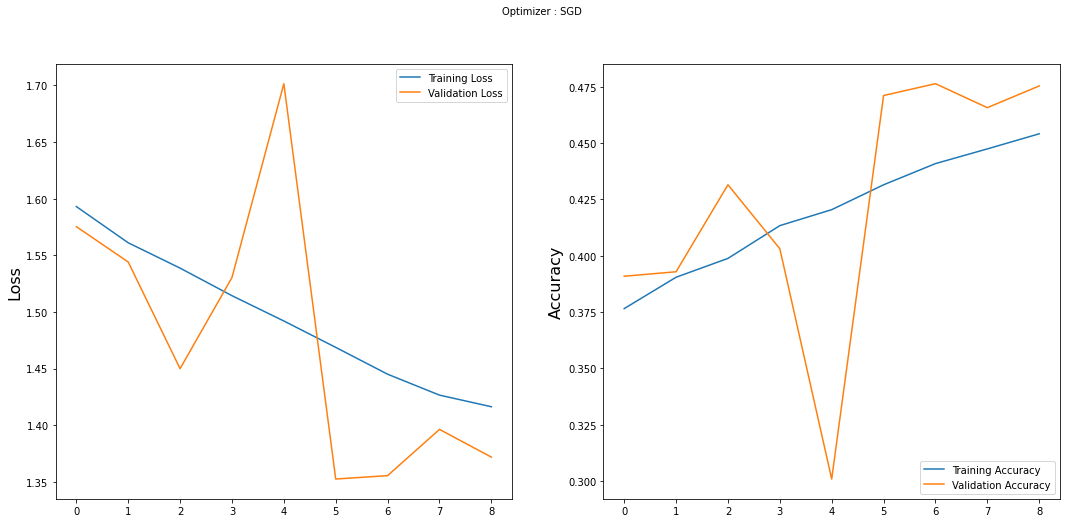

In [83]:
plt.figure(figsize=(18,8))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : SGD', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

CONTRIBUTION


In [84]:
#https://github.com/codebasics/deep-learning-keras-tf-tutorial/blob/master/16_cnn_cifar10_small_image_classification/cnn_cifar10_dataset.ipynb
#Contribution
#To see if other models can perform better
#Doing this on validation dataset



In [156]:
!pip install datasets
import datasets
from datasets import load_dataset

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [157]:
# Loading the validation data
X_valid = {}
X_valid = datasets.load_dataset('/content/images/validation')
X_valid.shape


Resolving data files:   0%|          | 0/7066 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

{'train': (7066, 2)}

In [158]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [159]:
#The layers were taken from the reference https://github.com/codebasics/deep-learning-keras-tf-tutorial/blob/master/16_cnn_cifar10_small_image_classification/cnn_cifar10_dataset.ipynb
model = models.Sequential([
        layers.Flatten(input_shape=(48,48,1)),
        layers.Dense(5000, activation='relu'),
        layers.Dense(3000, activation='relu'),
        layers.Dense(7, activation='softmax')    
    ])

In [162]:
#Written by me by referencing the CNN model above
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )
callbacks_list = [early_stopping]

epochs = 20

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer = Adam(lr=0.01),
             metrics=['accuracy'])

In [163]:
# To check if the dataset is correctly imported in this file
image_object = X_valid['train']
print((image_object))


Dataset({
    features: ['image', 'label'],
    num_rows: 7066
})


In [164]:
#modifications done (converting dictionary into array) inorder to fit.
import time
import numpy as np
train_dataset = image_object.map(lambda x: {'image': x['image'], 'label': x['label']})

train_images = []
train_labels = []

for example in train_dataset:
    train_images.append(example['image'])
    train_labels.append(example['label'])
train_images = np.array([np.array(image) for image in train_images])
train_labels = np.array(train_labels)

start_time = time.time()
model.fit(train_images,train_labels, callbacks=callbacks_list, epochs=20)
end_time = time.time()
total_time_taken = end_time - start_time
accuracy = model.evaluate(train_images, train_labels)


Epoch 1/20
221/221 [==============================] - 47s 207ms/step - loss: 3789.4863 - accuracy: 0.2154
Epoch 2/20
221/221 [==============================] - 45s 204ms/step - loss: 8.9373 - accuracy: 0.2587
Epoch 3/20
221/221 [==============================] - 45s 203ms/step - loss: 1.8104 - accuracy: 0.2587
Epoch 4/20
221/221 [==============================] - 45s 204ms/step - loss: 1.8107 - accuracy: 0.2587
Epoch 5/20
221/221 [==============================] - 45s 204ms/step - loss: 1.8119 - accuracy: 0.2588
Epoch 6/20
221/221 [==============================] - 45s 203ms/step - loss: 1.8109 - accuracy: 0.2587
Epoch 00006: early stopping
221/221 [==============================] - 10s 43ms/step - loss: 1.8095 - accuracy: 0.2588


In [165]:
print(total_time_taken)

272.04978251457214


In [166]:
print(accuracy[1]*100)

25.884518027305603


In [167]:
print(total_time_taken_train)
print(val_accuracy_train*100)

4078.2405121326447
51.53409242630005


In [168]:
# To plot the performance of two models (CNN and ANN) done on validation set

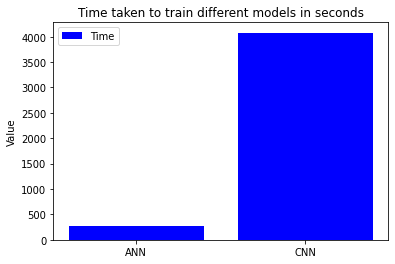

In [169]:
# plot the accuracy and time taken
import matplotlib.pyplot as plt
labels = ['ANN', 'CNN']
accuracy_values = [accuracy[1]*100, val_accuracy_train*100]
time_values = [total_time_taken, total_time_taken_train]


fig, a = plt.subplots()
a.bar(labels, time_values, color='b', label='Time')
a.set_ylabel('Value')
plt.legend()
plt.title('Time taken to train different models in seconds')
plt.show()



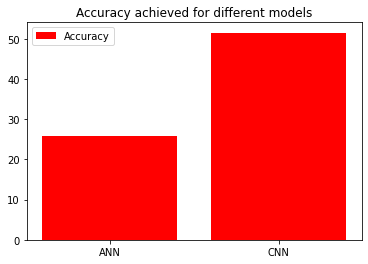

In [170]:
fig, b = plt.subplots()
b.bar(labels, accuracy_values, color='r', label='Accuracy')
plt.legend()
plt.title('Accuracy achieved for different models')
plt.show()